In [1]:
import flopy
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
nlay = 10
nrow = 205
ncol = 225

In [3]:
top_raw = pd.read_csv('top_elevation.csv')
bottoms_raw = pd.read_csv('bottom_elevations.csv')

In [4]:
# define the function that converts data frame to array; reshapes it and saves as variable
# 3D array of 10 layers by 205 rows by 225 columns
def array_shaper(j,layer):
    j = j.to_numpy()
    j = np.reshape(j, (205,225,layer))
    j = np.transpose(j, (2, 0, 1))
    return j

In [5]:
top_elevation = array_shaper(top_raw,1)

In [6]:
bottom_elevations = array_shaper(bottoms_raw,10)

<AxesSubplot:>

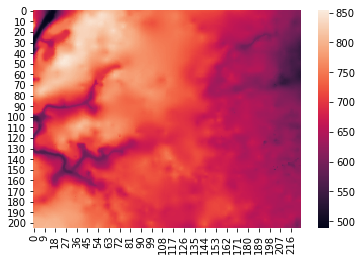

In [11]:
sns.heatmap(bottom_elevations[9,:,:], cmap = 'rocket')

In [ ]:
# create model object
modelname = "my_pumping_model"
m = flopy.modflow.Modflow(modelname, exe_name = 'mf2005')

# create flopy discretization object, length and time are meters (2) and days (4)
dis = flopy.modflow.ModflowDis(model=m, nlay=nlay, nrow=nrow, ncol=ncol, top=top_elevation_m, botm=bottom_elevations_m, 
                               itmuni = 4, lenuni = 2)